In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tabular-playground-series-mar-2021/sample_submission.csv
/kaggle/input/tabular-playground-series-mar-2021/train.csv
/kaggle/input/tabular-playground-series-mar-2021/test.csv


In [2]:
import pandas as pd
import plotly.express as ex
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots as mk_sp
import seaborn as sns
import plotly.offline as pyo
pyo.init_notebook_mode()
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(18,9))

<h1 style="background-color:azure; text-align:center; font-size:300%">1. Loading Data...</h1>

In [3]:
data=pd.read_csv('../input/tabular-playground-series-mar-2021/train.csv')
test=pd.read_csv('../input/tabular-playground-series-mar-2021/test.csv')

<h1 style="background-color:azure; text-align:center; font-size:300%">2. Exploratory Data Analysis</h1>

In [4]:
data.head()

id cat0 cat1 cat2 cat3 cat4 cat5 cat6 cat7 cat8  ...     cont2     cont3  \
0   0    A    I    A    B    B   BI    A    S    Q  ...  0.759439  0.795549   
1   1    A    I    A    A    E   BI    K    W   AD  ...  0.386385  0.541366   
2   2    A    K    A    A    E   BI    A    E   BM  ...  0.343255  0.616352   
3   3    A    K    A    C    E   BI    A    Y   AD  ...  0.831147  0.807807   
4   4    A    I    G    B    E   BI    C    G    Q  ...  0.338818  0.277308   

      cont4     cont5     cont6     cont7     cont8     cont9    cont10 target  
0  0.681917  0.621672  0.592184  0.791921  0.815254  0.965006  0.665915      0  
1  0.388982  0.357778  0.600044  0.408701  0.399353  0.927406  0.493729      0  
2  0.793687  0.552877  0.352113  0.388835  0.412303  0.292696  0.549452      0  
3  0.800032  0.619147  0.221789  0.897617  0.633669  0.760318  0.934242      0  
4  0.610578  0.128291  0.578764  0.279167  0.351103  0.357084  0.328960      1  

[5 rows x 32 columns]

In [5]:
test.head()

id cat0 cat1 cat2 cat3 cat4 cat5 cat6 cat7 cat8  ...     cont1     cont2  \
0   5    A    F    A    A    F   BI    A   AH   AX  ...  0.735690  0.578366   
1   6    A    H    C    A    E   AB    I    F    N  ...  0.313703  0.928885   
2   8    A    N    C    A    F   AB    A   AH   BC  ...  0.448201  0.424876   
3   9    B    L    C    A    F   BI    A    E   AX  ...  0.666092  0.598943   
4  11    A    F    A    B    F   BI    A   AH    I  ...  0.772229  0.479572   

      cont3     cont4     cont5     cont6     cont7     cont8     cont9  \
0  0.723154  0.228037  0.356227  0.551249  0.655693  0.598331  0.359987   
1  0.516602  0.600169  0.795224  0.248987  0.654614  0.347944  0.565520   
2  0.344729  0.242073  0.270632  0.746740  0.335590  0.341238  0.252289   
3  0.561971  0.806347  0.735983  0.538724  0.381566  0.481660  0.348514   
4  0.767745  0.252454  0.354810  0.178920  0.763479  0.562491  0.466261   

     cont10  
0  0.947489  
1  0.388580  
2  0.411592  
3  0.325723  
4  0.585781  

[5 rows x 31 columns]

In [6]:
data.shape

(300000, 32)

In [7]:
test.shape

(200000, 31)

In [8]:
print("Null elements present in train set {:d}".format(sum(data.isnull().sum())))

Null elements present in train set 0


In [9]:
print("Null elements present in test set {:d}".format(sum(test.isnull().sum())))

Null elements present in test set 0


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 32 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      300000 non-null  int64  
 1   cat0    300000 non-null  object 
 2   cat1    300000 non-null  object 
 3   cat2    300000 non-null  object 
 4   cat3    300000 non-null  object 
 5   cat4    300000 non-null  object 
 6   cat5    300000 non-null  object 
 7   cat6    300000 non-null  object 
 8   cat7    300000 non-null  object 
 9   cat8    300000 non-null  object 
 10  cat9    300000 non-null  object 
 11  cat10   300000 non-null  object 
 12  cat11   300000 non-null  object 
 13  cat12   300000 non-null  object 
 14  cat13   300000 non-null  object 
 15  cat14   300000 non-null  object 
 16  cat15   300000 non-null  object 
 17  cat16   300000 non-null  object 
 18  cat17   300000 non-null  object 
 19  cat18   300000 non-null  object 
 20  cont0   300000 non-null  float64
 21  cont1   30

In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      200000 non-null  int64  
 1   cat0    200000 non-null  object 
 2   cat1    200000 non-null  object 
 3   cat2    200000 non-null  object 
 4   cat3    200000 non-null  object 
 5   cat4    200000 non-null  object 
 6   cat5    200000 non-null  object 
 7   cat6    200000 non-null  object 
 8   cat7    200000 non-null  object 
 9   cat8    200000 non-null  object 
 10  cat9    200000 non-null  object 
 11  cat10   200000 non-null  object 
 12  cat11   200000 non-null  object 
 13  cat12   200000 non-null  object 
 14  cat13   200000 non-null  object 
 15  cat14   200000 non-null  object 
 16  cat15   200000 non-null  object 
 17  cat16   200000 non-null  object 
 18  cat17   200000 non-null  object 
 19  cat18   200000 non-null  object 
 20  cont0   200000 non-null  float64
 21  cont1   20

<h1 style="background-color:azure; text-align:center; font-size:200%">2.1 Continuous variables</h1>

In [12]:
data.describe()

id          cont0          cont1          cont2  \
count  300000.000000  300000.000000  300000.000000  300000.000000   
mean   250183.425697       0.504749       0.494073       0.516632   
std    144320.334812       0.206788       0.213037       0.214851   
min         0.000000      -0.049562       0.084480       0.094493   
25%    125399.750000       0.344985       0.317363       0.326047   
50%    250192.500000       0.479650       0.463170       0.471247   
75%    375246.250000       0.637657       0.693992       0.704625   
max    499999.000000       1.004559       1.009958       1.016600   

               cont3          cont4          cont5          cont6  \
count  300000.000000  300000.000000  300000.000000  300000.000000   
mean        0.474235       0.504848       0.502257       0.488229   
std         0.216636       0.227474       0.241243       0.211335   
min        -0.045316       0.168071      -0.036379       0.005199   
25%         0.292249       0.279303       0.276442       0.323914   
50%         0.387564       0.479858       0.554768       0.518089   
75%         0.644950       0.725779       0.735225       0.608537   
max         0.952187       0.858578       0.853022       0.966553   

               cont7          cont8          cont9         cont10  \
count  300000.000000  300000.000000  300000.000000  300000.000000   
mean        0.501739       0.488074       0.469496       0.508230   
std         0.203496       0.179048       0.194516       0.203393   
min         0.090901       0.024139       0.214866       0.097789   
25%         0.353054       0.358915       0.309934       0.368312   
50%         0.435404       0.410908       0.407477       0.446576   
75%         0.642023       0.612725       0.586793       0.581957   
max         1.035818       1.055885       1.005652       1.011331   

              target  
count  300000.000000  
mean        0.264870  
std         0.441265  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         1.000000  
max         1.000000

In [13]:
print("train set ranges between -0.05 to 1.02")

train set ranges between -0.05 to 1.02


In [14]:
test.describe()

id          cont0          cont1          cont2  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean   249723.611455       0.505388       0.493960       0.516425   
std    144363.694402       0.207417       0.212695       0.214752   
min         5.000000      -0.044929       0.090478       0.098591   
25%    124460.250000       0.344748       0.317788       0.326210   
50%    249679.500000       0.479633       0.463195       0.470893   
75%    374661.250000       0.638773       0.693882       0.704745   
max    499998.000000       1.006825       1.011597       1.012128   

               cont3          cont4          cont5          cont6  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        0.475286       0.504772       0.501180       0.487315   
std         0.216919       0.227199       0.241375       0.211335   
min        -0.038178       0.171321      -0.036337      -0.005648   
25%         0.292777       0.279413       0.275422       0.322365   
50%         0.392118       0.480299       0.554723       0.517318   
75%         0.645803       0.725272       0.735137       0.607454   
max         0.965609       0.867198       0.848617       0.964635   

               cont7          cont8          cont9         cont10  
count  200000.000000  200000.000000  200000.000000  200000.000000  
mean        0.502684       0.488331       0.469813       0.508974  
std         0.203793       0.178895       0.194999       0.203926  
min         0.096067       0.013554       0.215540       0.113059  
25%         0.353388       0.359121       0.309888       0.368999  
50%         0.436139       0.411318       0.407066       0.446578  
75%         0.646104       0.612508       0.588008       0.583082  
max         1.033760       1.053155       1.007189       1.007168

In [15]:
print("test set ranges between -0.05 to 1.02")

test set ranges between -0.05 to 1.02


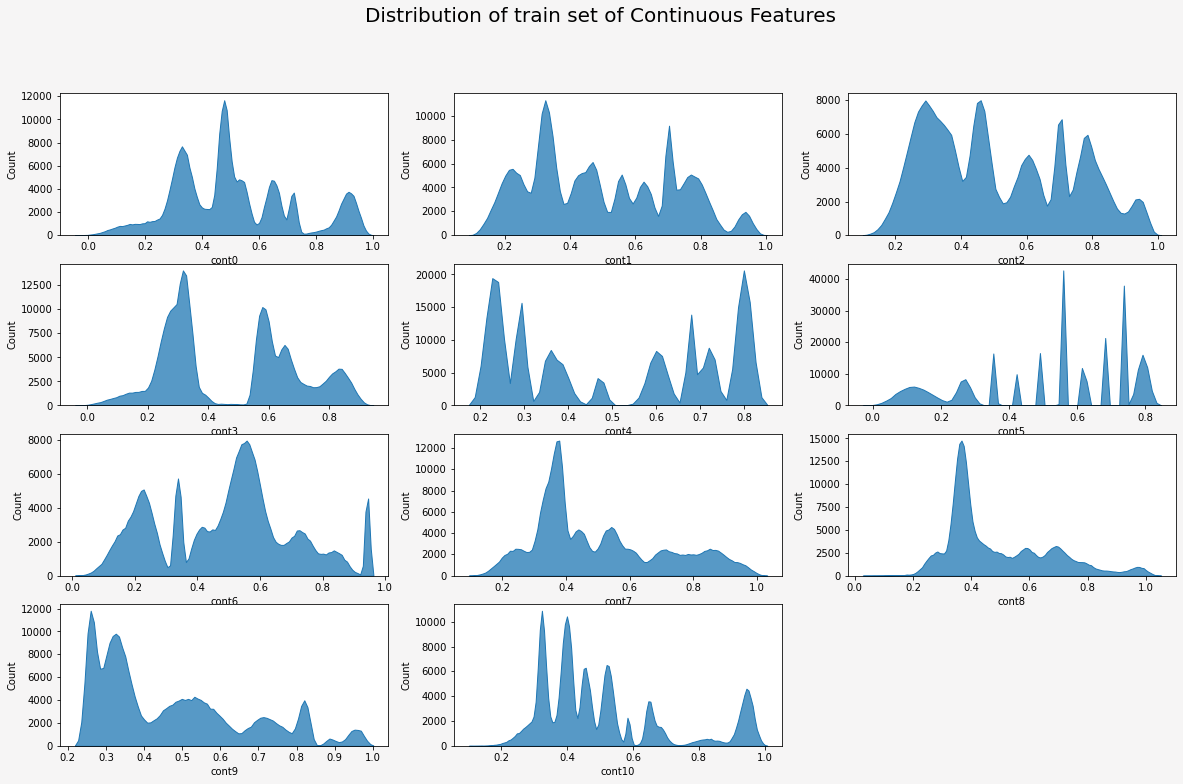

In [16]:
fig, ax = plt.subplots(nrows=4, ncols=3, facecolor='#f6f5f5', figsize=(20,12))
r=0
c=0
for i in range(11):
    s="cont"+str(i)
    sns.histplot(data, x=s, ax=ax[r][c], element='poly')
    c+=1
    if(c==3):
        r+=1
        c=0
fig.suptitle('Distribution of train set of Continuous Features', fontsize=20)
ax[3][2].remove()

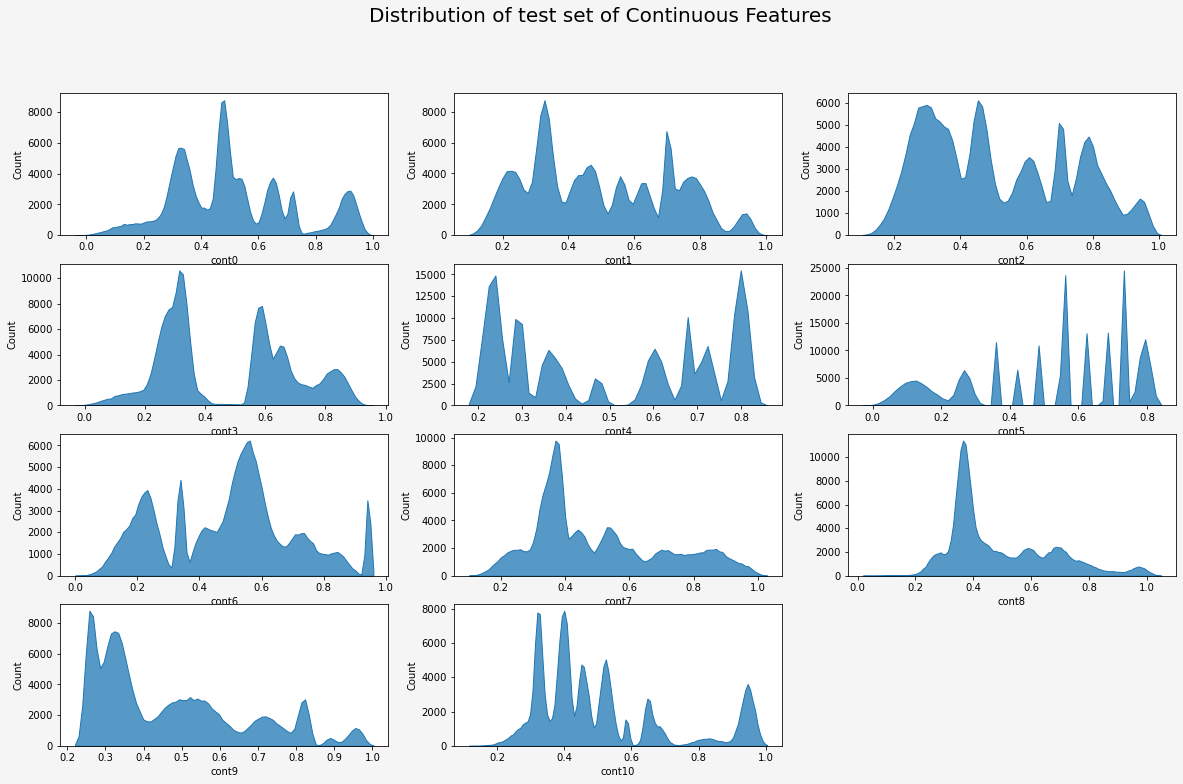

In [17]:
fig, ax = plt.subplots(nrows=4, ncols=3, facecolor='#f6f5f5', figsize=(20,12))
r=0
c=0
for i in range(11):
    s="cont"+str(i)
    sns.histplot(test, x=s, ax=ax[r][c], element='poly')
    c+=1
    if(c==3):
        r+=1
        c=0
fig.suptitle('Distribution of test set of Continuous Features', fontsize=20)
ax[3][2].remove()

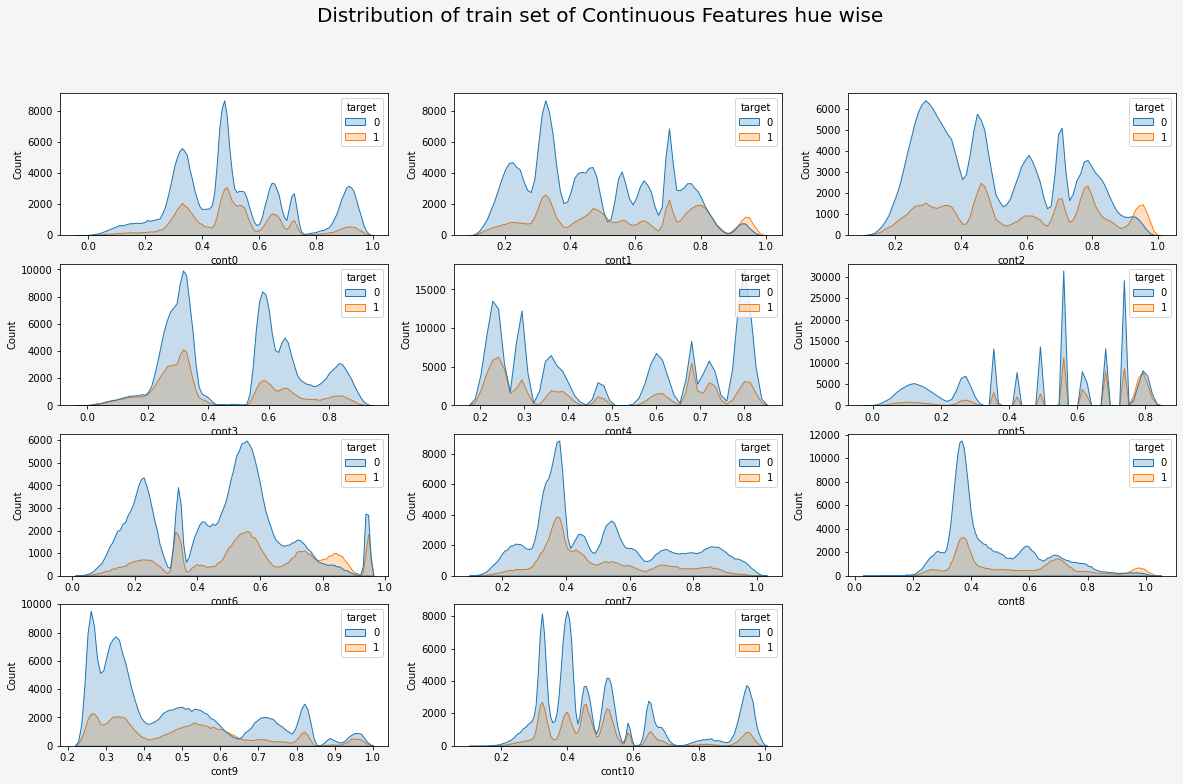

In [18]:
fig, ax = plt.subplots(nrows=4, ncols=3, facecolor='#f6f5f5', figsize=(20,12))
r=0
c=0
for i in range(11):
    s="cont"+str(i)
    sns.histplot(data, x=s, hue='target', ax=ax[r][c], element='poly')
    c+=1
    if(c==3):
        r+=1
        c=0
fig.suptitle('Distribution of train set of Continuous Features hue wise', fontsize=20)
ax[3][2].remove()

In [19]:
print("the distribution of 0 and 1 target is same in continuous feature")

the distribution of 0 and 1 target is same in continuous feature


Text(0.5, 0.98, 'Correlation Matrix')

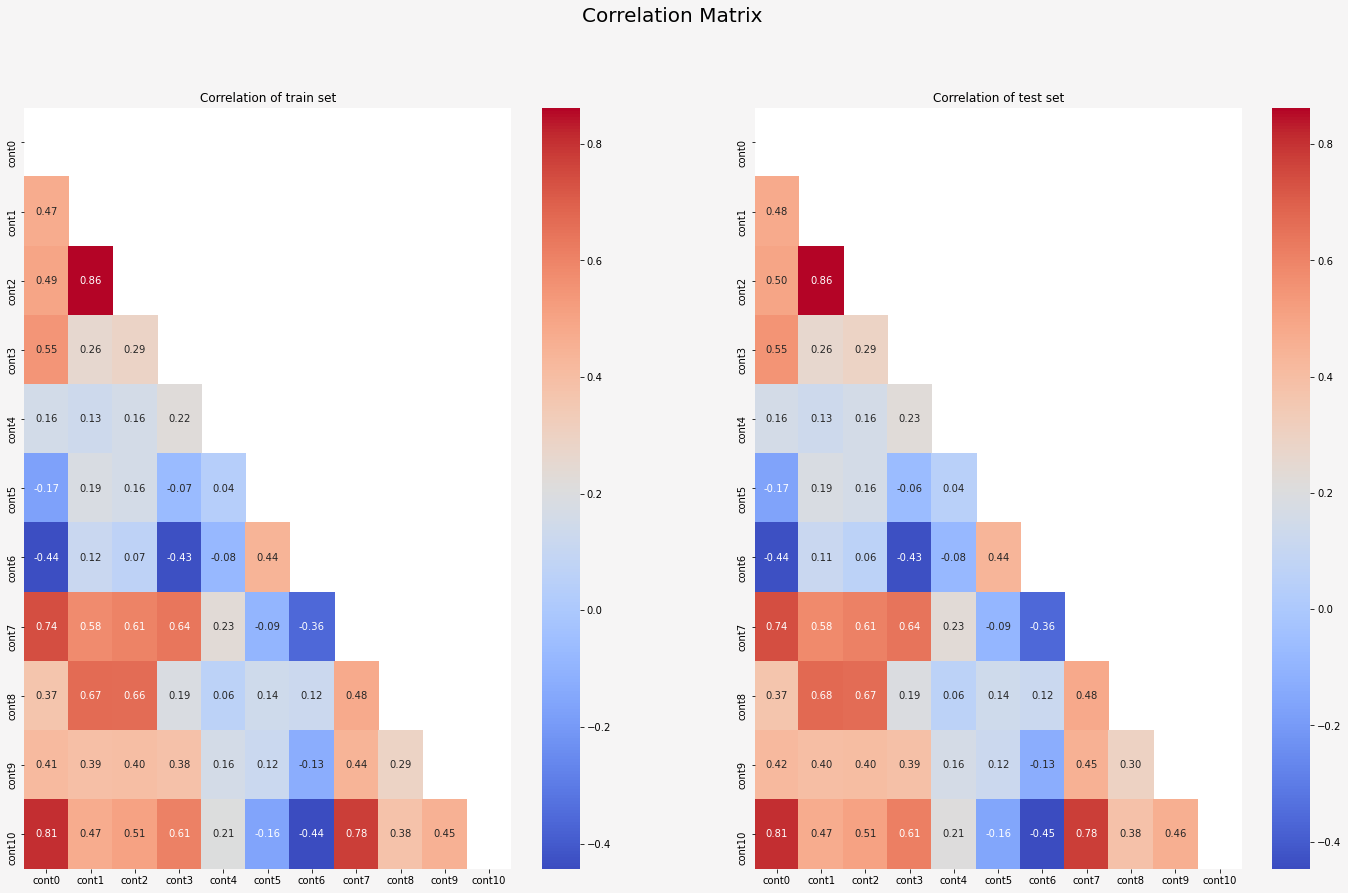

In [20]:
fig, ax = plt.subplots(ncols=2, facecolor='#f6f5f5', figsize=(24, 14))
cols=['cont'+str(i) for i in range(11)]
dcorr=data[cols].corr('pearson')
tcorr=test[cols].corr('pearson')
mask = np.triu(np.ones_like(dcorr, dtype=np.bool))

sns.heatmap(dcorr, mask=mask, ax=ax[0], annot=True, fmt=".2f", cmap='coolwarm')
sns.heatmap(tcorr, mask=mask, ax=ax[1], annot=True, fmt=".2f", cmap='coolwarm')
ax[0].set_title('Correlation of train set')
ax[1].set_title('Correlation of test set')
fig.suptitle('Correlation Matrix', fontsize=20)

In [21]:
print("Max corr in train set and test is {:d}% between cont1 and cont2".format(86))

Max corr in train set and test is 86% between cont1 and cont2


In [ ]:
fig, ax = plt.subplots(nrows=4, ncols=3, facecolor='#f6f5f5', figsize=(25,14))
r=0
c=0
l1=["cont"+str(i) for i in range(11)]
for i in l1:
    sns.scatterplot(data=data, x=i, y='cont0', hue='target', ax=ax[r][c])
    c+=1
    if(c==3):
        r+=1
        c=0
fig.suptitle('ScatterPlot of train set of Continuous Features hue wise', fontsize=20)
ax[3][2].remove()

In [ ]:
fig, ax = plt.subplots(nrows=4, ncols=3, facecolor='#f6f5f5', figsize=(25,14))
r=0
c=0
l1=["cont"+str(i) for i in range(11)]
for i in l1:
    sns.scatterplot(data=data, x=i, y='cont1', hue='target', ax=ax[r][c])
    c+=1
    if(c==3):
        r+=1
        c=0
fig.suptitle('ScatterPlot of train set of Continuous Features hue wise', fontsize=20)
ax[3][2].remove()

In [ ]:
fig, ax = plt.subplots(nrows=4, ncols=3, facecolor='#f6f5f5', figsize=(25,14))
r=0
c=0
l1=["cont"+str(i) for i in range(11)]
for i in l1:
    sns.scatterplot(data=data, x=i, y='cont2', hue='target', ax=ax[r][c])
    c+=1
    if(c==3):
        r+=1
        c=0
fig.suptitle('ScatterPlot of train set of Continuous Features hue wise', fontsize=20)
ax[3][2].remove()

In [ ]:
fig, ax = plt.subplots(nrows=4, ncols=3, facecolor='#f6f5f5', figsize=(25,14))
r=0
c=0
l1=["cont"+str(i) for i in range(11)]
for i in l1:
    sns.scatterplot(data=data, x=i, y='cont3', hue='target', ax=ax[r][c])
    c+=1
    if(c==3):
        r+=1
        c=0
fig.suptitle('ScatterPlot of train set of Continuous Features hue wise', fontsize=20)
ax[3][2].remove()

In [ ]:
fig, ax = plt.subplots(nrows=4, ncols=3, facecolor='#f6f5f5', figsize=(25,14))
r=0
c=0
l1=["cont"+str(i) for i in range(11)]
for i in l1:
    sns.scatterplot(data=data, x=i, y='cont4', hue='target', ax=ax[r][c])
    c+=1
    if(c==3):
        r+=1
        c=0
fig.suptitle('ScatterPlot of train set of Continuous Features hue wise', fontsize=20)
ax[3][2].remove()

In [ ]:
fig, ax = plt.subplots(nrows=4, ncols=3, facecolor='#f6f5f5', figsize=(25,14))
r=0
c=0
l1=["cont"+str(i) for i in range(11)]
for i in l1:
    sns.scatterplot(data=data, x=i, y='cont5', hue='target', ax=ax[r][c])
    c+=1
    if(c==3):
        r+=1
        c=0
fig.suptitle('ScatterPlot of train set of Continuous Features hue wise', fontsize=20)
ax[3][2].remove()

In [ ]:
fig, ax = plt.subplots(nrows=4, ncols=3, facecolor='#f6f5f5', figsize=(25,14))
r=0
c=0
l1=["cont"+str(i) for i in range(11)]
for i in l1:
    sns.scatterplot(data=data, x=i, y='cont6', hue='target', ax=ax[r][c])
    c+=1
    if(c==3):
        r+=1
        c=0
fig.suptitle('ScatterPlot of train set of Continuous Features hue wise', fontsize=20)
ax[3][2].remove()

In [ ]:
fig, ax = plt.subplots(nrows=4, ncols=3, facecolor='#f6f5f5', figsize=(25,14))
r=0
c=0
l1=["cont"+str(i) for i in range(11)]
for i in l1:
    sns.scatterplot(data=data, x=i, y='cont7', hue='target', ax=ax[r][c])
    c+=1
    if(c==3):
        r+=1
        c=0
fig.suptitle('ScatterPlot of train set of Continuous Features hue wise', fontsize=20)
ax[3][2].remove()

In [ ]:
fig, ax = plt.subplots(nrows=4, ncols=3, facecolor='#f6f5f5', figsize=(25,14))
r=0
c=0
l1=["cont"+str(i) for i in range(11)]
for i in l1:
    sns.scatterplot(data=data, x=i, y='cont8', hue='target', ax=ax[r][c])
    c+=1
    if(c==3):
        r+=1
        c=0
fig.suptitle('ScatterPlot of train set of Continuous Features hue wise', fontsize=20)
ax[3][2].remove()

In [ ]:
fig, ax = plt.subplots(nrows=4, ncols=3, facecolor='#f6f5f5', figsize=(25,14))
r=0
c=0
l1=["cont"+str(i) for i in range(11)]
for i in l1:
    sns.scatterplot(data=data, x=i, y='cont9', hue='target', ax=ax[r][c])
    c+=1
    if(c==3):
        r+=1
        c=0
fig.suptitle('ScatterPlot of train set of Continuous Features hue wise', fontsize=20)
ax[3][2].remove()

In [ ]:
fig, ax = plt.subplots(nrows=4, ncols=3, facecolor='#f6f5f5', figsize=(25,14))
r=0
c=0
l1=["cont"+str(i) for i in range(11)]
for i in l1:
    sns.scatterplot(data=data, x=i, y='cont10', hue='target', ax=ax[r][c])
    c+=1
    if(c==3):
        r+=1
        c=0
fig.suptitle('ScatterPlot of train set of Continuous Features hue wise', fontsize=20)
ax[3][2].remove()

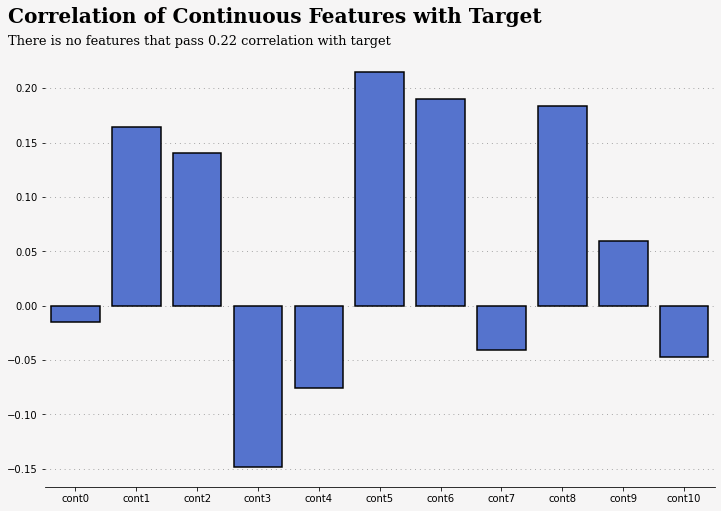

In [22]:
# Thanks a lot @dwin183287 for sharing this amazinf function!

background_color = "#f6f5f5"
cols = ["cont"+str(i) for i in range(11)]
fig = plt.figure(figsize=(12, 8), facecolor=background_color)
gs = fig.add_gridspec(1, 1)
ax0 = fig.add_subplot(gs[0, 0])

ax0.set_facecolor(background_color)
ax0.text(-1.1, 0.26, 'Correlation of Continuous Features with Target', fontsize=20, fontweight='bold', fontfamily='serif')
ax0.text(-1.1, 0.24, 'There is no features that pass 0.22 correlation with target', fontsize=13, fontweight='light', fontfamily='serif')

chart_df = pd.DataFrame(data[cols].corrwith(data['target']))
chart_df.columns = ['corr']
sns.barplot(x=chart_df.index, y=chart_df['corr'], ax=ax0, color='RoyalBlue', zorder=3, edgecolor='black', linewidth=1.5)
ax0.grid(which='major', axis='y', zorder=0, color='gray', linestyle=':', dashes=(1,5))
ax0.set_ylabel('')

for s in ["top","right", 'left']:
    ax0.spines[s].set_visible(False)

plt.show()

In [23]:
# chart_df

<h1 style="background-color:azure; text-align:center; font-size:200%">2.2 Categorical variables</h1>

In [24]:
for i in range(19):
    s="cat"+str(i)
    l1=data[s].unique()
    l2=test[s].unique()
    if(sorted(l1) != sorted(l2)):
        print("Feature having different categorical variable is "+s)

Feature having different categorical variable is cat10


In [25]:
print("length of cat10 feature in train set is {:d} and in test set is {:d}".format(len(data['cat10'].unique()), len(test['cat10'].unique())))

length of cat10 feature in train set is 299 and in test set is 295


In [26]:
l1=data['cat10'].unique()
l2=test['cat10'].unique()
x=[i for i in l1 if i not in l2]
y=[i for i in l2 if i not in l1]
print("Features present in l1 but not in l2:", x)
print("Features present in l2 but not in l1:", y)

Features present in l1 but not in l2: ['BS', 'MW', 'CH', 'AW', 'MO', 'MK', 'GH', 'FW', 'JF', 'LK', 'IL', 'CX']
Features present in l2 but not in l1: ['BU', 'EJ', 'BW', 'JM', 'KM', 'DG', 'CA', 'KE']


In [27]:
for i in range(19):
    s="cat"+str(i)
    print(s+" has {:d} unique values".format(len(data[s].unique())))

cat0 has 2 unique values
cat1 has 15 unique values
cat2 has 19 unique values
cat3 has 13 unique values
cat4 has 20 unique values
cat5 has 84 unique values
cat6 has 16 unique values
cat7 has 51 unique values
cat8 has 61 unique values
cat9 has 19 unique values
cat10 has 299 unique values
cat11 has 2 unique values
cat12 has 2 unique values
cat13 has 2 unique values
cat14 has 2 unique values
cat15 has 4 unique values
cat16 has 4 unique values
cat17 has 4 unique values
cat18 has 4 unique values


In [28]:
l1=[]
for i in range(19):
    s="cat"+str(i)
    df=data.groupby([s])[s].count().sort_values(ascending=False)
    val=100.0*df.values[0]/len(data)
    if(val>=50.0):
        l1.append(s+" : "+df.index[0])
    print("Percentage of {:s} in {:s} is {:.2f}%".format(df.index[0], s, val))

Percentage of A in cat0 is 74.51%
Percentage of I in cat1 is 30.27%
Percentage of A in cat2 is 56.23%
Percentage of A in cat3 is 62.42%
Percentage of E in cat4 is 43.13%
Percentage of BI in cat5 is 79.52%
Percentage of A in cat6 is 62.63%
Percentage of AH in cat7 is 15.27%
Percentage of BM in cat8 is 14.13%
Percentage of A in cat9 is 67.31%
Percentage of DJ in cat10 is 10.53%
Percentage of A in cat11 is 86.31%
Percentage of A in cat12 is 85.71%
Percentage of A in cat13 is 97.57%
Percentage of A in cat14 is 53.39%
Percentage of B in cat15 is 67.86%
Percentage of D in cat16 is 68.97%
Percentage of D in cat17 is 82.38%
Percentage of B in cat18 is 85.16%


In [29]:
df=data.groupby(['cat5'])['cat5'].count().sort_values(ascending=False)
for i in range(84):
    print("{:s}: {:.2f}%".format(df.index[i], 100.0*df.values[i]/len(data)))

BI: 79.52%
AB: 13.88%
BU: 2.25%
K: 0.90%
G: 0.23%
BQ: 0.16%
N: 0.15%
CL: 0.11%
AL: 0.09%
BO: 0.08%
AY: 0.08%
CI: 0.07%
BA: 0.07%
AW: 0.07%
M: 0.07%
AT: 0.06%
R: 0.06%
T: 0.06%
BC: 0.06%
BG: 0.06%
I: 0.06%
L: 0.05%
BV: 0.05%
BS: 0.05%
F: 0.05%
CA: 0.05%
AE: 0.05%
AQ: 0.05%
BK: 0.05%
D: 0.05%
V: 0.04%
Q: 0.04%
AR: 0.04%
BL: 0.04%
O: 0.04%
BY: 0.04%
AX: 0.04%
AS: 0.04%
CC: 0.04%
BD: 0.04%
CK: 0.04%
U: 0.04%
AF: 0.04%
AV: 0.04%
AP: 0.04%
AM: 0.04%
CD: 0.04%
AA: 0.03%
AH: 0.03%
BE: 0.03%
CJ: 0.03%
BR: 0.03%
X: 0.03%
Y: 0.03%
A: 0.03%
BB: 0.03%
BH: 0.03%
AO: 0.03%
C: 0.03%
H: 0.03%
BJ: 0.02%
CE: 0.02%
AI: 0.02%
AN: 0.02%
S: 0.02%
BN: 0.02%
CG: 0.02%
E: 0.02%
AU: 0.02%
J: 0.02%
BX: 0.02%
CF: 0.02%
P: 0.02%
BT: 0.01%
AJ: 0.01%
BM: 0.01%
CH: 0.01%
AK: 0.01%
BF: 0.01%
ZZ: 0.01%
B: 0.01%
BP: 0.01%
AG: 0.01%
CB: 0.01%


In [31]:
df=data.groupby(['cat7'])['cat7'].count().sort_values(ascending=False)
for i in range(51):
    print("{:s}: {:.2f}%".format(df.index[i], 100.0*df.values[i]/len(data)))

AH: 15.27%
E: 13.20%
AS: 8.44%
J: 5.38%
AN: 5.37%
U: 5.22%
N: 4.99%
AF: 3.82%
AK: 3.23%
AV: 2.65%
S: 2.64%
AI: 2.56%
A: 2.14%
K: 2.09%
Y: 1.97%
G: 1.89%
F: 1.85%
AW: 1.77%
C: 1.44%
AA: 1.23%
R: 1.00%
AX: 0.88%
O: 0.85%
AP: 0.77%
AD: 0.61%
V: 0.60%
AY: 0.58%
AO: 0.58%
AG: 0.57%
H: 0.56%
AL: 0.52%
W: 0.51%
B: 0.47%
Q: 0.44%
AM: 0.39%
AR: 0.37%
L: 0.31%
AT: 0.31%
M: 0.30%
D: 0.28%
BA: 0.26%
AU: 0.22%
X: 0.22%
AC: 0.22%
I: 0.21%
P: 0.20%
AB: 0.18%
AE: 0.15%
T: 0.13%
AJ: 0.08%
AQ: 0.07%


In [32]:
df=data.groupby(['cat8'])['cat8'].count().sort_values(ascending=False)
for i in range(61):
    print("{:s}: {:.2f}%".format(df.index[i], 100.0*df.values[i]/len(data)))

BM: 14.13%
AE: 8.15%
AX: 7.38%
Y: 6.95%
H: 5.19%
S: 5.00%
AD: 4.89%
X: 4.74%
L: 4.52%
AT: 4.41%
K: 4.37%
N: 2.64%
I: 2.29%
AF: 1.96%
BC: 1.92%
AN: 1.90%
AS: 1.68%
BN: 1.64%
BJ: 1.43%
Q: 1.38%
AK: 1.35%
A: 1.10%
M: 1.04%
AJ: 1.02%
J: 0.86%
AG: 0.84%
AU: 0.80%
AW: 0.75%
BD: 0.73%
AO: 0.61%
F: 0.57%
BO: 0.53%
BG: 0.43%
BH: 0.36%
BK: 0.32%
AM: 0.27%
AY: 0.23%
AV: 0.19%
AI: 0.19%
BI: 0.17%
BL: 0.14%
BE: 0.10%
E: 0.07%
V: 0.07%
BB: 0.07%
AH: 0.07%
BA: 0.07%
AP: 0.06%
BF: 0.06%
AL: 0.06%
U: 0.05%
C: 0.05%
O: 0.05%
AB: 0.04%
G: 0.03%
P: 0.02%
AQ: 0.02%
T: 0.02%
B: 0.02%
AC: 0.02%
AR: 0.01%


IndexError: index 61 is out of bounds for axis 0 with size 61

In [29]:
print(l1, "are categorical features having more than 50% of train set")

['cat0 : A', 'cat2 : A', 'cat3 : A', 'cat5 : BI', 'cat6 : A', 'cat9 : A', 'cat11 : A', 'cat12 : A', 'cat13 : A', 'cat14 : A', 'cat15 : B', 'cat16 : D', 'cat17 : D', 'cat18 : B'] are categorical features having more than 50% of train set


In [30]:
fig=mk_sp(rows=3, cols=3)
r=1
c=1
l1=['cat0']+["cat"+str(i) for i in range(11, 19)]
for i in l1:
    df=data.groupby([i])[i].count().sort_values(ascending=False)
#     df=data['cat0'].value_counts().sort_values(ascending=True)
    x1=go.Bar(x=df.index, y=df.values)
    fig.add_trace(x1, row=r, col=c)
    fig.update_xaxes(title=i, row=r, col=c)
    fig.update_layout(barmode='stack')
    c+=1
    if(c==4):
        r+=1
        c=1
fig.update_layout(width=1000, height=700,title_text="Distribution of train set of Continuous Features with categories < 10", showlegend=False)
fig.show()

In [31]:
fig=mk_sp(rows=3, cols=3)
r=1
c=1
l1=['cat0']+["cat"+str(i) for i in range(11, 19)]
for i in l1:
    df=test.groupby([i])[i].count().sort_values(ascending=False)
#     df=data['cat0'].value_counts().sort_values(ascending=True)
    x1=go.Bar(x=df.index, y=df.values, name='Label: 0')
    fig.add_trace(x1, row=r, col=c)
    fig.update_xaxes(title=i, row=r, col=c)
    fig.update_layout(barmode='stack')
    c+=1
    if(c==4):
        r+=1
        c=1
fig.update_layout(width=1000, height=700,title_text="Distribution of test set of Continuous Features with categories < 10", showlegend=False)
fig.show()

In [32]:
fig=mk_sp(rows=4, cols=3)
r=1
c=1
l1=["cat"+str(i) for i in range(1, 11)]
for i in l1:
    df=data.groupby([i])[i].count().sort_values(ascending=False)
#     df=data['cat0'].value_counts().sort_values(ascending=True)
    x1=go.Bar(x=df.index, y=df.values)
    fig.add_trace(x1, row=r, col=c)
    fig.update_xaxes(title=i, row=r, col=c)
    fig.update_layout(barmode='stack')
    c+=1
    if(c==4):
        r+=1
        c=1
fig.update_layout(width=1600, height=1600,title_text="Distribution of train set of Continuous Features with categories > 10", showlegend=False)
fig.show()

In [33]:
fig=mk_sp(rows=4, cols=3)
r=1
c=1
l1=["cat"+str(i) for i in range(1, 11)]
for i in l1:
    df=test.groupby([i])[i].count().sort_values(ascending=False)
#     df=data['cat0'].value_counts().sort_values(ascending=True)
    x1=go.Bar(x=df.index, y=df.values)
    fig.add_trace(x1, row=r, col=c)
    fig.update_xaxes(title=i, row=r, col=c)
    fig.update_layout(barmode='stack')
    c+=1
    if(c==4):
        r+=1
        c=1
fig.update_layout(width=1600, height=1600,title_text="Distribution of test set of Continuous Features with categories > 10", showlegend=False)
fig.show()

In [34]:
fig=mk_sp(rows=3, cols=3)
r=1
c=1
data_0=data[data["target"]==0]
data_1=data[data["target"]==1]
l1=['cat0']+["cat"+str(i) for i in range(11, 19)]
for i in l1:
    df_0=data_0.groupby([i])[i].count().sort_values(ascending=False)
    df_1=data_1.groupby([i])[i].count().sort_values(ascending=False)
#     df=data['cat0'].value_counts().sort_values(ascending=True)
    x1=go.Bar(x=df_0.index, y=df_0.values, name='Label: 0')
    x2=go.Bar(x=df_1.index, y=df_1.values, name='Label: 1')
    fig.add_trace(x1, row=r, col=c)
    fig.add_trace(x2, row=r, col=c)
    fig.update_xaxes(title=i, row=r, col=c)
    fig.update_layout(barmode='stack')
    c+=1
    if(c==4):
        r+=1
        c=1
fig.update_layout(width=1000, height=700,title_text="Distribution of train set of Continuous Features hue wise", showlegend=False)
fig.show()

In [35]:
fig=mk_sp(rows=4, cols=3)
r=1
c=1
data_0=data[data["target"]==0]
data_1=data[data["target"]==1]
l1=["cat"+str(i) for i in range(1, 11)]
for i in l1:
    df_0=data_0.groupby([i])[i].count().sort_values(ascending=False)
    df_1=data_1.groupby([i])[i].count().sort_values(ascending=False)
#     df=data['cat0'].value_counts().sort_values(ascending=True)
    x1=go.Bar(x=df_0.index, y=df_0.values, name='Label: 0')
    x2=go.Bar(x=df_1.index, y=df_1.values, name='Label: 1')
    fig.add_trace(x1, row=r, col=c)
    fig.add_trace(x2, row=r, col=c)
    fig.update_xaxes(title=i, row=r, col=c)
    fig.update_layout(barmode='stack')
    c+=1
    if(c==4):
        r+=1
        c=1
fig.update_layout(width=1600, height=1600,title_text="Distribution of train set of Continuous Features  with categories > 10", showlegend=False)
fig.show()

<h1 style="background-color:azure; text-align:center; font-size:200%">2.3 Target variable</h1>

In [37]:
print('Percentage of target variable: 0 is {:.2f}%'.format(100.0*len(data[data['target']==0])/len(data)))
print('Percentage of target variable: 1 is {:.2f}%'.format(100.0*len(data[data['target']==1])/len(data)))

Percentage of target variable: 0 is 73.51%
Percentage of target variable: 1 is 26.49%


<h1 style="background-color:azure; text-align:center; font-size:300%">3. Feature Engineering</h1>

In [38]:
print("dropping cat10 feature as train and test has some different categories and also categories of each is > 200")

dropping cat10 feature as train and test has some different categories and also categories of each is > 200


In [39]:
data.drop(columns=['cat10'], inplace=True)
test.drop(columns=['cat10'], inplace=True)

In [42]:
l1=[]
df=data.groupby(['cat8'])['cat8'].count().sort_values(ascending=False)
temp1=[]
temp2=[]
temp3=[]
for i in range(61):
    val=100.0*df.values[i]/len(data)
    if(val>2 and val<3):
        temp1.append(df.index[i])
    elif(val>1 and val<2):
        temp2.append(df.index[i])
    elif (val<1):
        temp3.append(df.index[i])
l1.append(temp1)
l1.append(temp2)
l1.append(temp3)

In [43]:
l2=[]
df=data.groupby(['cat7'])['cat7'].count().sort_values(ascending=False)
temp1=[]
temp2=[]
temp3=[]
for i in range(50):
    val=100.0*df.values[i]/len(data)
    if(val>2 and val<3):
        temp1.append(df.index[i])
    elif(val>1 and val<2):
        temp2.append(df.index[i])
    elif(val<1):
        temp3.append(df.index[i])
l2.append(temp1)
l2.append(temp2)
l2.append(temp3)

In [44]:
l3=[]
df=data.groupby(['cat7'])['cat7'].count().sort_values(ascending=False)
temp1=[]
for i in range(50):
    val=100.0*df.values[i]/len(data)
    if(val<1):
        temp1.append(df.index[i])
l3.append(temp1)

In [ ]:
data1=data
test1=test
data1['cat1']=data1['cat1'].apply(lambda x:x if x not in ['D', 'E'] else "cat10")
data1['cat2']=data1['cat2'].apply(lambda x:x if x not in ['N', 'H', 'B', 'S', 'U', 'K', 'R', 'E'] else "cat20")
data1['cat3']=data1['cat3'].apply(lambda x:x if x not in ['K', 'G', 'L', 'J', 'H', 'N', 'I'] else "cat30")
data1['cat4']=data1['cat4'].apply(lambda x:x if x not in ['M', 'C', 'O', 'B', 'S', 'T', 'L', 'Q', 'P', 'A', 'N', 'R'] else "cat40")
data1['cat5']=data1['cat5'].apply(lambda x:x if x not in l3[0] else "cat50")
data1['cat6']=data1['cat6'].apply(lambda x:x if x not in ['O', 'S', 'F', 'Y', 'D', 'B', 'U', 'Q', 'W'] else "cat60")
data1['cat7']=data1['cat7'].apply(lambda x:x if x not in l2[0] else "cat70")
data1['cat7']=data1['cat7'].apply(lambda x:x if x not in l2[1] else "cat70")
data1['cat7']=data1['cat7'].apply(lambda x:x if x not in l2[2] else "cat70")
data1['cat8']=data1['cat8'].apply(lambda x:x if x not in l1[0] else "cat80")
data1['cat8']=data1['cat8'].apply(lambda x:x if x not in l1[1] else "cat80")
data1['cat8']=data1['cat8'].apply(lambda x:x if x not in l1[2] else "cat80")
data1['cat9']=data1['cat9'].apply(lambda x:x if x not in ['R', 'V', 'Q', 'B', 'G', 'D', 'O', 'U', 'W', 'X', 'S'] else "cat90")


test1['cat1']=test1['cat1'].apply(lambda x:x if x not in ['D', 'E'] else "cat10")
test1['cat2']=test1['cat2'].apply(lambda x:x if x not in ['N', 'H', 'B', 'S', 'U', 'K', 'R', 'E'] else "cat20")
test1['cat3']=test1['cat3'].apply(lambda x:x if x not in ['K', 'G', 'L', 'J', 'H', 'N', 'I'] else "cat30")
test1['cat4']=test1['cat4'].apply(lambda x:x if x not in ['M', 'C', 'O', 'B', 'S', 'T', 'L', 'Q', 'P', 'A', 'N', 'R'] else "cat40")
test1['cat5']=test1['cat5'].apply(lambda x:x if x not in l3[0] else "cat50")
test1['cat6']=test1['cat6'].apply(lambda x:x if x not in ['O', 'S', 'F', 'Y', 'D', 'B', 'U', 'Q', 'W'] else "cat60")
test1['cat7']=test1['cat7'].apply(lambda x:x if x not in l1[0] else "cat70")
test1['cat7']=test1['cat7'].apply(lambda x:x if x not in l1[1] else "cat70")
test1['cat7']=test1['cat7'].apply(lambda x:x if x not in l1[2] else "cat70")
test1['cat8']=test1['cat8'].apply(lambda x:x if x not in l1[0] else "cat80")
test1['cat8']=test1['cat8'].apply(lambda x:x if x not in l1[1] else "cat80")
test1['cat8']=test1['cat8'].apply(lambda x:x if x not in l1[2] else "cat80")
test1['cat9']=test1['cat9'].apply(lambda x:x if x not in ['R', 'V', 'Q', 'B', 'G', 'D', 'O', 'U', 'W', 'X', 'S'] else "cat90")